04102022

Бруцкий-Стемпковский

v. 01

Предварительная обработка данных.

Требуется:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

Импортируем требуемые библиотеки

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

Прочитаем датафрейм

In [2]:
data = pd.read_excel("Real estate valuation data set.xlsx")
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Нормализуем данные в диапазон [-1; 1] без предварительного удаления выбросов и пропусков.

Для этого соберём предварительного имена колонок для последующей сборки датафрейма. 

Нормализацию выполним в переменную d в диапазоне [-1; 1], это необходимо потому, что операция нормализации преобразует датарейм в списки. 

По списку заголовков создадим датафрейм заново.

Так как нет атрибута axis, нормализация выполняется по умолчанию по столбцам.


In [3]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
names = data.columns
d = scaler.fit_transform(data)
data = pd.DataFrame(d, columns = names)
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1.000000,-0.454545,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.995157,-0.454545,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.990315,1.000000,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.985472,0.818182,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.980630,-0.636364,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...,...,...
409,0.980630,-0.272727,-0.374429,0.255641,-1.0,-0.770238,-0.346992,-0.858053
410,0.985472,-1.000000,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,0.990315,0.272727,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,0.995157,-0.272727,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


Обработаем пропуски и выбросы.
Визуализируем пустые пустые данные с помощью тепловой карты.
Синим цветом обзначены заполненные данные.

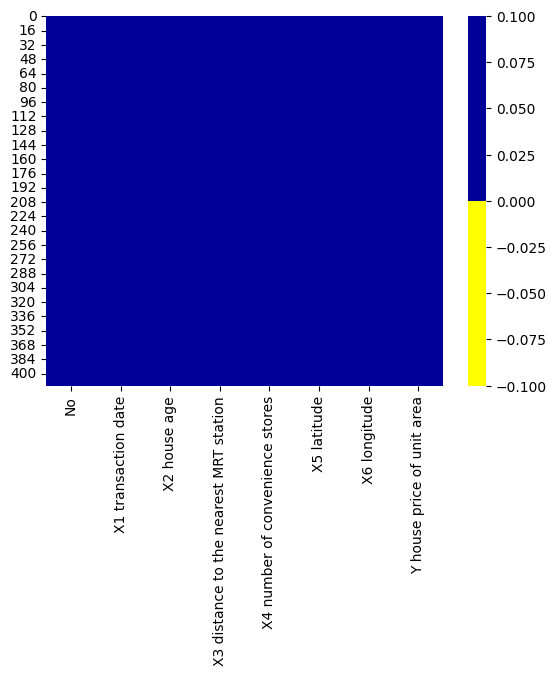

In [4]:
colours = ['#ffff00', '#000099']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colours));

Пропусков нет)))
Но вообще пропуски можно:
1. Удалять отсутствующие по строкам (удаление всей выборки)
2. Удалять отсутствующие по столбцам (удаление всего признака)
3. Замена средним значением данного признака (т.е. по столбцам)
4. Замена на какое-то иное значение (не знаю, где может пригодиться, но ок...)

Обработаем выбросы.

Для этого построим ящик с усами. Он показывает медиану, первый и третий квартили, усы отстоят на расстояние до 1,5(Q3 - Q1). Всё, что лежит за пределами усов - выбросы.

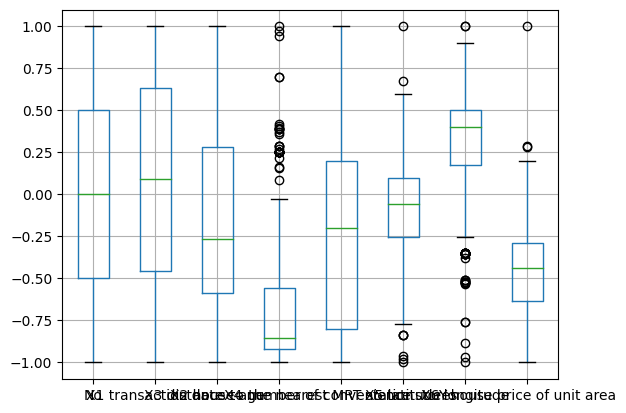

In [5]:
data.boxplot();

Атрибуты X3, X5, X6, Y имеют выбросы. Удалим сроки целиком...

any - удаение строки с хотя бы одним выбросом

In [6]:
Q_1 = data.quantile(q = 0.25)
Q_3 = data.quantile(q = 0.75)
IQR = data.apply(sp.stats.iqr)
data_clean = data.loc[~((data < (Q_1-1.5*IQR))|(data > (Q_3+1.5*IQR))).any(axis = 1)]
(data.shape, data_clean.shape)

((414, 8), (371, 8))

Пример очистки датафрейма от выбросов в одном из столбцов. Далее пока не применяется.

In [7]:
col = 'X3 distance to the nearest MRT station'
data_clean_2 = data.loc[~((data[col] < (Q_1[col]-1.5*IQR[col]))|(data[col] > (Q_3[col]+1.5*IQR[col])))]
data_clean_2.shape

(377, 8)

In [8]:
data_clean

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-1.000000,-0.454545,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.995157,-0.454545,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,-0.990315,1.000000,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,-0.985472,0.818182,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.980630,-0.636364,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...,...,...
408,0.975787,0.636364,-0.155251,-0.334112,-0.4,-0.243093,-0.161096,-0.626934
410,0.985472,-1.000000,-0.744292,-0.979249,0.8,0.024237,0.500323,-0.228389
411,0.990315,0.272727,-0.141553,-0.886278,0.4,0.142996,0.430451,-0.399454
412,0.995157,-0.272727,-0.630137,-0.974808,0.0,-0.159719,0.447919,-0.182894


Было удалено около 50 записей (~12 %). Годится.

Построим корреляционную матрицу.

In [9]:
corr_matrix = data_clean.corr()
corr_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.027619,-0.025486,0.059664,-0.039778,-0.029643,-0.076678,-0.079587
X1 transaction date,-0.027619,1.000000,-0.004756,0.071438,0.018207,0.035130,-0.009494,0.072176
X2 house age,-0.025486,-0.004756,1.000000,-0.050015,0.055115,0.107225,0.018306,-0.253273
X3 distance to the nearest MRT station,0.059664,0.071438,-0.050015,1.000000,-0.540865,-0.341925,-0.616209,-0.671904
X4 number of convenience stores,-0.039778,0.018207,0.055115,-0.540865,1.000000,0.308797,0.291690,0.522053
X5 latitude,-0.029643,0.035130,0.107225,-0.341925,0.308797,1.000000,0.083142,0.455005
X6 longitude,-0.076678,-0.009494,0.018306,-0.616209,0.291690,0.083142,1.000000,0.391990
Y house price of unit area,-0.079587,0.072176,-0.253273,-0.671904,0.522053,0.455005,0.391990,1.000000


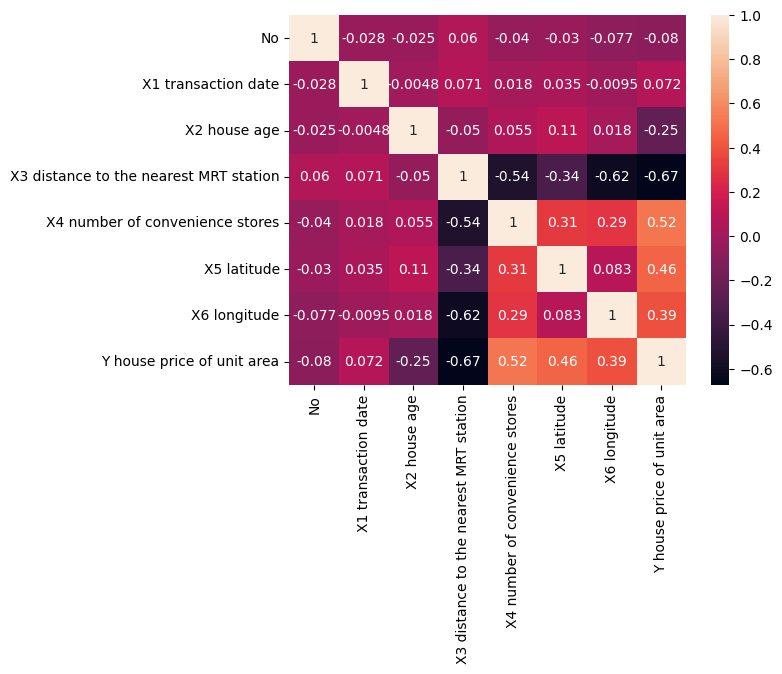

In [10]:
sns.heatmap(corr_matrix, annot=True);

Построим гистограммы распределения.

StopIteration: 

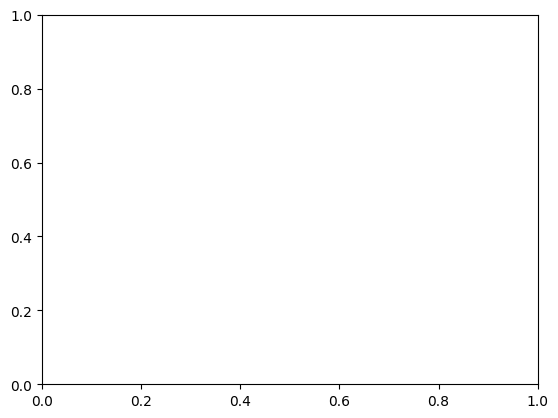

In [11]:
sns.histplot(data_clean)

StopIteration: 

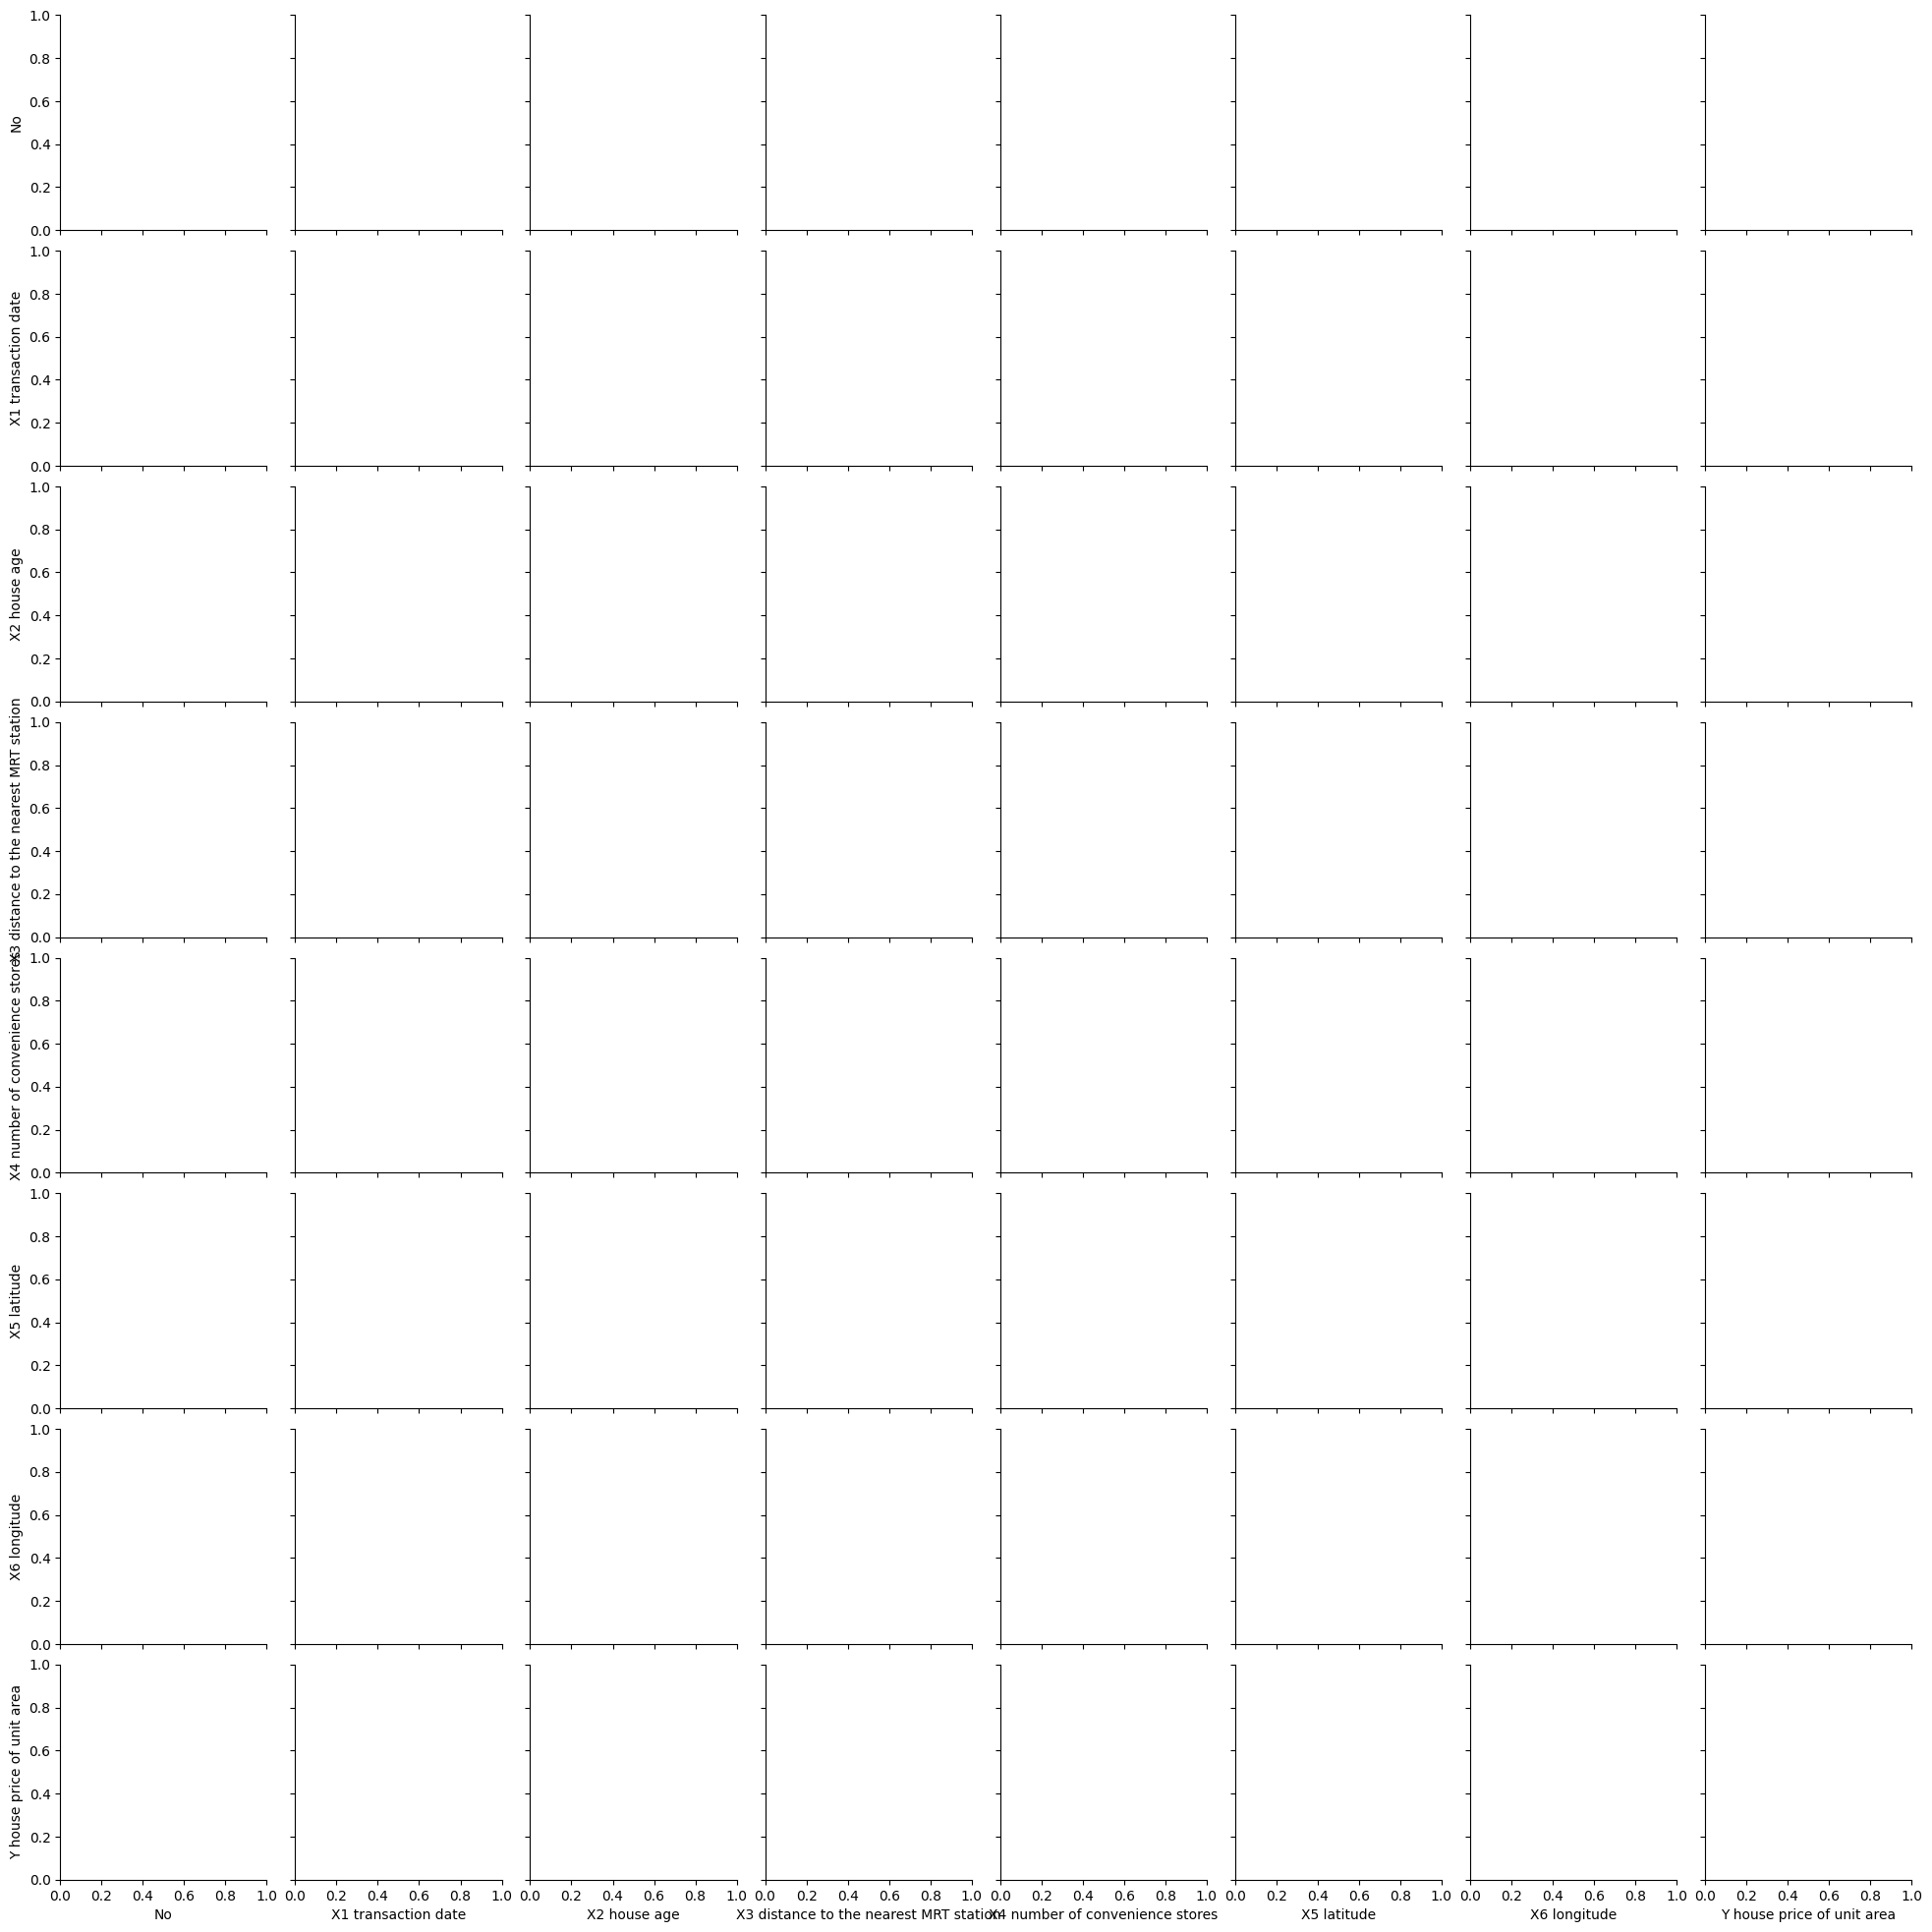

In [ ]:
sns.pairplot(data_clean);